In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('C:/Mehul/UIC/SECOND SEMESTER/IDS 561 (BIG DATA)/pROJECT/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)

In [5]:
df.shape

(4920, 8)

In [6]:
df.isna().sum()


Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
dtype: int64

In [7]:
#percentage of missing values 
(df.isnull().sum()/df.shape[0])*100


Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
Symptom_7    53.902439
dtype: float64

<AxesSubplot:>

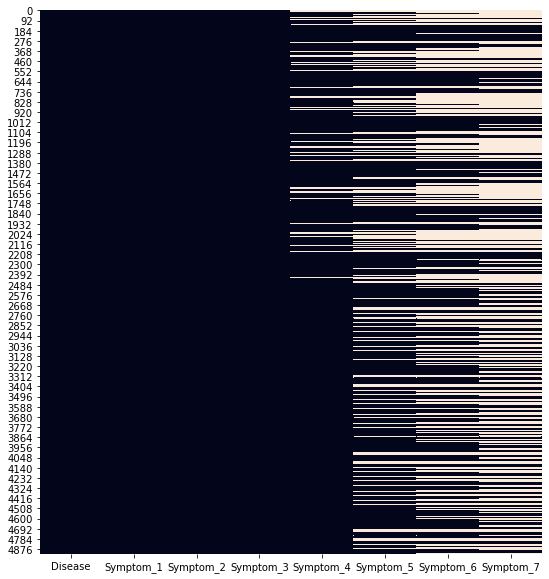

In [8]:
plt.figure(figsize=(9,10))
sns.heatmap(df.isnull(),cbar=False)

In [9]:
df.columns


Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7'],
      dtype='object')

In [10]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,(vertigo) Paroymsal Positional Vertigo,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264


In [11]:
#Remove Hyphen
for col in df.columns:
    df[col]= df[col].str.replace('_',' ')

In [12]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN


In [13]:
df.fillna(0,inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0


In [14]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [15]:
df['Disease'].value_counts()


(vertigo) Paroymsal  Positional Vertigo    120
Varicose veins                             120
Common Cold                                120
Paralysis (brain hemorrhage)               120
Arthritis                                  120
Heart attack                               120
Tuberculosis                               120
Gastroenteritis                            120
Hepatitis E                                120
Acne                                       120
Bronchial Asthma                           120
Allergy                                    120
Pneumonia                                  120
AIDS                                       120
Diabetes                                   120
Migraine                                   120
Hepatitis B                                120
Typhoid                                    120
hepatitis A                                120
Dimorphic hemmorhoids(piles)               120
Hyperthyroidism                            120
Hypoglycemia 

In [16]:
df_s = pd.read_csv('C:/Mehul/UIC/SECOND SEMESTER/IDS 561 (BIG DATA)/pROJECT/Symptom-severity.csv')
df_s.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [17]:
# Remove Hyphen
df_s['Symptom']=df_s['Symptom'].str.replace('_',' ')

In [18]:
df_s['Symptom'].unique()


array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [19]:
a= np.array(df_s['weight'])
a

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5], dtype=int64)

In [20]:
vals = df.values
symptoms = df_s['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_s[df_s['Symptom'] == symptoms[i]]['weight'].values[0]
    
newdf = pd.DataFrame(vals, columns=cols)
newdf.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


In [21]:
newdf = newdf.replace('dischromic  patches', 0)
newdf = newdf.replace('spotting  urination',0)
newdf = newdf.replace('foul smell of urine',0)
newdf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0


In [22]:
X = newdf.drop(['Disease'],axis=1)
y = newdf['Disease']

In [23]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,1,3,4,0,0,0,0
1,3,4,0,0,0,0,0
2,1,4,0,0,0,0,0
3,1,3,0,0,0,0,0
4,1,3,4,0,0,0,0


In [24]:
y.sample(6)

4603            Migraine
3341         Hepatitis B
1736    Bronchial Asthma
333         Hypoglycemia
1490         Common Cold
667         Tuberculosis
Name: Disease, dtype: object

In [25]:
SPLITTING THE DATASET


SyntaxError: invalid syntax (<ipython-input-25-5b64dee898b4>, line 1)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.svm import SVC

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=0)


In [28]:
clf_svc= SVC()
clf_svc.fit(X_train,y_train)


SVC()

In [29]:
predict = clf_svc.predict(X_test)

In [30]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [31]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

<AxesSubplot:>

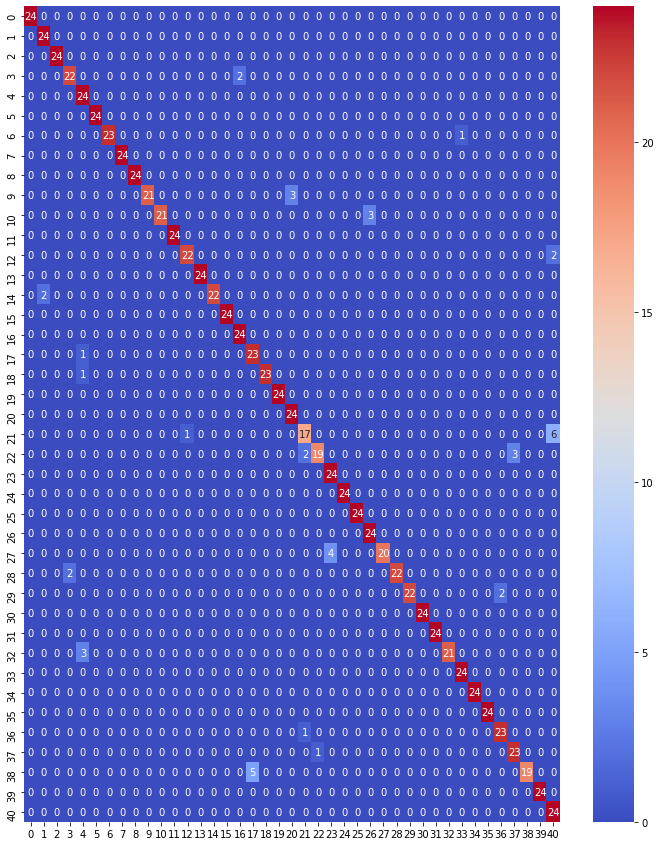

In [32]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf_rfc = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
clf_rfc.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 700
building tree 2 of 700
building tree 3 of 700
building tree 4 of 700
building tree 5 of 700building tree 6 of 700
building tree 7 of 700
building tree 8 of 700

building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700building tree 14 of 700
building tree 15 of 700

building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700building tree 22 of 700building tree 23 of 700


building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700building tree 29 of 700
building tree 30 of 700
building tree 31 of 700

building tree 32 of 700
building tree 33 of 700
building tree 34 of 700building tree 35 of 700
building tree 36 of 700

building tree 37 of 700
building tree 38 of 700
building tree 39 of 700
building tree 40 of 700
building tree 41 of 700
building tree 42 of 700
b

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.2s


building tree 126 of 700
building tree 127 of 700building tree 128 of 700

building tree 129 of 700
building tree 130 of 700
building tree 131 of 700
building tree 132 of 700
building tree 133 of 700
building tree 134 of 700building tree 135 of 700

building tree 136 of 700
building tree 137 of 700
building tree 138 of 700
building tree 139 of 700
building tree 140 of 700
building tree 141 of 700
building tree 142 of 700
building tree 143 of 700
building tree 144 of 700
building tree 145 of 700
building tree 146 of 700
building tree 147 of 700
building tree 148 of 700
building tree 149 of 700
building tree 150 of 700
building tree 151 of 700
building tree 152 of 700
building tree 153 of 700building tree 154 of 700

building tree 155 of 700
building tree 156 of 700
building tree 157 of 700
building tree 158 of 700
building tree 159 of 700building tree 160 of 700

building tree 161 of 700
building tree 162 of 700
building tree 163 of 700
building tree 164 of 700
building tree 165 of 700


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.5s



building tree 255 of 700
building tree 256 of 700
building tree 257 of 700
building tree 258 of 700building tree 259 of 700

building tree 260 of 700building tree 261 of 700

building tree 262 of 700building tree 263 of 700
building tree 264 of 700

building tree 265 of 700
building tree 266 of 700
building tree 267 of 700
building tree 268 of 700
building tree 269 of 700
building tree 270 of 700
building tree 271 of 700
building tree 272 of 700
building tree 273 of 700
building tree 274 of 700
building tree 275 of 700
building tree 276 of 700
building tree 277 of 700
building tree 278 of 700building tree 279 of 700

building tree 280 of 700building tree 281 of 700

building tree 282 of 700
building tree 283 of 700
building tree 284 of 700building tree 285 of 700

building tree 286 of 700
building tree 287 of 700
building tree 288 of 700
building tree 289 of 700
building tree 290 of 700
building tree 291 of 700
building tree 292 of 700
building tree 293 of 700
building tree 294 of 700

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.0s


building tree 446 of 700
building tree 447 of 700
building tree 448 of 700
building tree 449 of 700building tree 450 of 700

building tree 451 of 700building tree 452 of 700building tree 453 of 700


building tree 454 of 700
building tree 455 of 700
building tree 456 of 700
building tree 457 of 700
building tree 458 of 700building tree 459 of 700

building tree 460 of 700
building tree 461 of 700
building tree 462 of 700
building tree 463 of 700
building tree 464 of 700
building tree 465 of 700building tree 466 of 700

building tree 467 of 700
building tree 468 of 700
building tree 469 of 700
building tree 470 of 700
building tree 471 of 700building tree 472 of 700

building tree 473 of 700building tree 474 of 700
building tree 475 of 700building tree 476 of 700


building tree 477 of 700
building tree 478 of 700building tree 479 of 700

building tree 480 of 700building tree 481 of 700
building tree 482 of 700
building tree 483 of 700

building tree 484 of 700
building tree 485 of 700


[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    1.7s


building tree 635 of 700
building tree 636 of 700
building tree 637 of 700
building tree 638 of 700
building tree 639 of 700
building tree 640 of 700
building tree 641 of 700
building tree 642 of 700
building tree 643 of 700building tree 644 of 700
building tree 645 of 700

building tree 646 of 700
building tree 647 of 700
building tree 648 of 700
building tree 649 of 700
building tree 650 of 700
building tree 651 of 700
building tree 652 of 700
building tree 653 of 700
building tree 654 of 700
building tree 655 of 700
building tree 656 of 700
building tree 657 of 700
building tree 658 of 700
building tree 659 of 700
building tree 660 of 700
building tree 661 of 700
building tree 662 of 700
building tree 663 of 700
building tree 664 of 700
building tree 665 of 700
building tree 666 of 700
building tree 667 of 700
building tree 668 of 700
building tree 669 of 700
building tree 670 of 700
building tree 671 of 700
building tree 672 of 700
building tree 673 of 700building tree 674 of 700
b

[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    2.0s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [36]:
predict = clf_rfc.predict(X_test)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.3s finished


In [37]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 98.48%


In [38]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, predict)*100
print(rfc_acc)

98.47560975609755


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)
print(confusion_matrix)

[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]


In [39]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.86      1.00      0.92        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

In [ ]:
def predict(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = clf_rfc.predict(res)
    print(pred[0])

In [ ]:
predict('itching' ,'skin rash', 'nodal skin eruptions', 'headache')

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(y_test, y_pred)*100
print(logreg_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
def predict2(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = logreg.predict(res)
    print(pred[0])

In [ ]:
predict2('itching' ,'skin rash', 'nodal skin eruptions', 'headache')

In [ ]:
from sklearn.model_selection import cross_val_score 

svm_scores = cross_val_score(clf_svc, X_train, y_train, cv = 6)
svm_scores.mean()

In [ ]:
 preds = clf_svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_test, preds)*100
print(svm_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

In [ ]:
def predict1(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = clf_svc.predict(res)
    print(pred[0])

In [ ]:
predict1('itching' ,'skin rash', 'nodal skin eruptions', 'headache')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []


for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    error.append(np.mean(pred_i != y_train))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

In [ ]:
def predict4(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = classifier.predict(res)
    print(pred[0])

In [ ]:
predict4('itching' ,'skin rash', 'nodal skin eruptions', 'headache')

In [ ]:
preds1 = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, preds1)*100
print(knn_acc)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds1))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds1)
print(confusion_matrix)

In [ ]:
plt.figure()
x = ["RandomForest", "SVM", "Logistic Regression", "Knn"]
y = [rfc_acc, svm_acc, logreg_acc, knn_acc]


plt.bar(x,y)


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies among the models')
plt.show()